# 2022 NZMSA Data Science Submission.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

## Numerical

In [2]:
dataset = pd.read_csv("weather-data.csv")

print("Average (mean):")
print(dataset[['tmpc', 'dwpc', 'relh', 'sknt', 'gust']].mean())
print("-"*20)
print("Standard deviation:")
print(dataset[['tmpc', 'dwpc', 'relh', 'sknt', 'gust']].std())
print("-"*20)
print("10th and 90th percentile range")
percentiles_10th = dataset[['tmpc', 'dwpc', 'relh', 'sknt', 'gust']].quantile(0.1)
percentiles_90th = dataset[['tmpc', 'dwpc', 'relh', 'sknt', 'gust']].quantile(0.9)
print(percentiles_90th - percentiles_10th)

Average (mean):
tmpc    15.811503
dwpc    12.115772
relh    79.782307
sknt     8.919029
gust    30.962594
dtype: float64
--------------------
Standard deviation:
tmpc     4.235197
dwpc     3.738005
relh    12.562199
sknt     5.348379
gust     6.319510
dtype: float64
--------------------
10th and 90th percentile range
tmpc    10.00
dwpc    10.00
relh    31.14
sknt    13.00
gust    15.00
dtype: float64


## Graphical

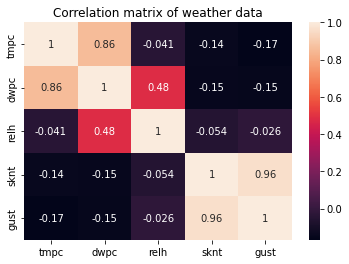

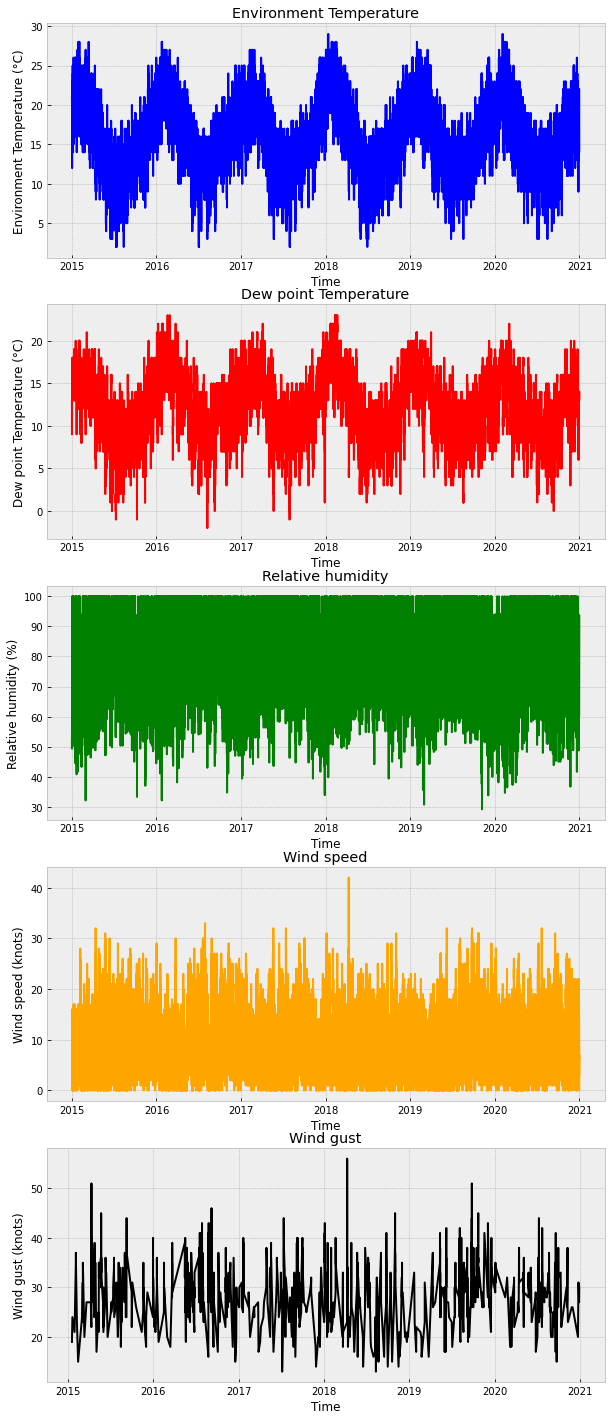

In [3]:
# correlation plot
corrMatrix = dataset[['tmpc', 'dwpc', 'relh', 'sknt', 'gust']].dropna().corr()
sns.heatmap(corrMatrix, annot=True)
plt.title("Correlation matrix of weather data")
plt.show()

# plot all numerical data
dataset['valid'] = pd.to_datetime(dataset['valid'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce') # convert valid dates to datetime objects
plt.style.use("bmh")
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, squeeze=True)

tmpc_data = dataset[['valid','tmpc']].dropna()
ax1.plot(tmpc_data["valid"], tmpc_data["tmpc"], color="blue")
ax1.set_title("Environment Temperature")
ax1.set_xlabel("Time")
ax1.set_ylabel("Environment Temperature (°C)")

dwpc_data = dataset[['valid','dwpc']].dropna()
ax2.plot(dwpc_data["valid"], dwpc_data["dwpc"], color="red")
ax2.set_title("Dew point Temperature")
ax2.set_xlabel("Time")
ax2.set_ylabel("Dew point Temperature (°C)")

relh_data = dataset[['valid','relh']].dropna()
ax3.plot(relh_data["valid"], relh_data["relh"], color="green")
ax3.set_title("Relative humidity")
ax3.set_xlabel("Time")
ax3.set_ylabel("Relative humidity (%)")

sknt_data = dataset[['valid','sknt']].dropna()
ax4.plot(sknt_data["valid"], sknt_data["sknt"], color="orange")
ax4.set_title("Wind speed")
ax4.set_xlabel("Time")
ax4.set_ylabel("Wind speed (knots)")

gust_data = dataset[['valid','gust']].dropna()
ax5.plot(gust_data["valid"], gust_data["gust"], color="black")
ax5.set_title("Wind gust")
ax5.set_xlabel("Time")
ax5.set_ylabel("Wind gust (knots)")

fig.set_size_inches(10,25)

## Comment on the dataset

All the data in the dataset appear to be collected from the same station which is NZAA. The data are collected on the dates ranging from 1/01/2015 0:00 to 30/12/2020 23:30. The the gust measurement column of the dataset is sparsely populated compared to the other measurement columns of tmpc, dwpc, relh and sknt. The peak_wind_drct column appears to have no data present in it so it was ignored in the EDA. For some tmpc and dwpc, there is no available data for some dates.

# Data Processing

## Making changes

In [21]:
dataset = pd.read_csv("weather-data.csv")
print(dataset.head()) # Show the first five results.

# remove useless data
# dataset.drop(columns=[" station", "gust", "peak_wind_drct"], inplace=True)
dataset = dataset[['valid', 'tmpc']]

# backfill nan values
print("Initial non-NaN values:")
print(dataset.count())
dataset = dataset.fillna(method="bfill")
print("-"*20)
print("Backfilled non-NaN values:")
print(dataset.count())
print("-"*20)
dataset['time'] = np.arange(1,len(dataset)+1)
dataset.drop(['valid'], axis=1, inplace=True)
# convert 'valid' column data type to datetime and extract year and month
# dataset['valid'] = pd.to_datetime(dataset['valid'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
# dataset = dataset.set_index('valid')
# dataset = dataset.asfreq("30T")

# dataset['year'] =   [i.year for i in dataset['valid']]
# dataset['month'] =   [i.month for i in dataset['valid']]

dataset

   station             valid  tmpc  dwpc   relh  sknt  gust  peak_wind_drct
0     NZAA  2015-01-01 00:00  21.0  11.0  52.77  15.0   NaN             NaN
1     NZAA  2015-01-01 00:30  21.0  10.0  49.37  16.0   NaN             NaN
2     NZAA  2015-01-01 01:00  21.0  12.0  56.38  16.0   NaN             NaN
3     NZAA  2015-01-01 01:30  21.0  13.0  60.21  16.0   NaN             NaN
4     NZAA  2015-01-01 02:00  21.0  12.0  56.38  16.0   NaN             NaN
Initial non-NaN values:
valid    103713
tmpc     103678
dtype: int64
--------------------
Backfilled non-NaN values:
valid    103713
tmpc     103713
dtype: int64
--------------------


,tmpc,time
0,21.0,1
1,21.0,2
2,21.0,3
3,21.0,4
4,21.0,5
...,...,...
103708,19.0,103709
103709,19.0,103710
103710,20.0,103711
103711,20.0,103712


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset['time'], dataset['tmpc'], test_size=0.3, random_state=42)
plt.scatter(x_test, y_test, label="Testing data", color ='g', alpha=.7)
plt.scatter(x_train, y_train, label="Training data", color ='r', alpha=.7)

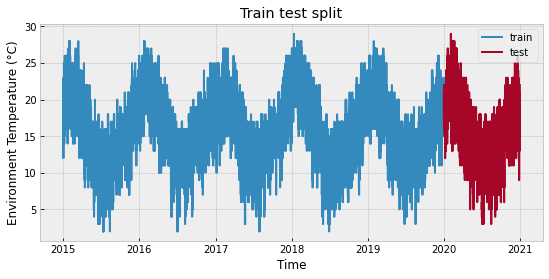

In [5]:
# split data into train-test set
# test data will be all data starting from start of 2020 and training data is all data prior to that

train = dataset[dataset['year'] < 2020]
test = dataset[dataset['year'] >= 2020]

fig, ax=plt.subplots(figsize=(9, 4))
plt.plot(train['valid'], train['tmpc'], label='train')
plt.plot(test['valid'], test['tmpc'], label='test')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Environment Temperature (°C)')
plt.title("Train test split")
plt.show()

## Reason for changes
- ` station` column is removed because they are all from NZAA
- `gust` column is removed because there is not sufficient data matching with other data
    - only using other data where gust was recorded as well will waste much of the data we have
- `peak_wind_drct` column is removed since there is no data in this column
- `valid` column converted to datetime format to extract the year and month numerical data
    - `valid` was previously in object format which is not compatible with models
- The dataset is reduced to the columns `valid` and `tmpc` to be used in the model
- `series` column is added for future predictions

# Data Modelling

In [ ]:
from sklearn.ensemble import AdaBoostRegressor


In [ ]:
from darts import TimeSeries
series = TimeSeries.from_dataframe(dataset, 'series', 'tmpc')
train, val = series[:-100], series[-100:]



In [ ]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=10000)

In [ ]:
series.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [ ]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['tmpc'].plot(ax=ax, label='train')
data_test['tmpc'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
plt.legend()
plt.show()

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.